In [42]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

In [1]:
# cnn
# 先说一些基础 矩阵乘积
import numpy as np
a=np.array([[0,0,0],
            [0,1,2],
            [0,4,5]
           ])

w=np.array([[0,1,0],
           [1,1,1],
           [0,1,0]])

In [2]:
x1=np.array([
    [1,2,3],
    [4,5,6]
])

In [3]:
x1

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
x1.reshape(2,3,1)

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [5]:
np.dot(a,w)

array([[0, 0, 0],
       [1, 3, 1],
       [4, 9, 4]])

In [6]:
from keras.datasets import mnist
from keras.utils import np_utils
np.random.seed(0)

Using TensorFlow backend.


In [7]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [45]:
type(y_train)

numpy.ndarray

In [39]:
type(X_train)

numpy.ndarray

In [47]:
y_train.shape

(60000,)

In [41]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

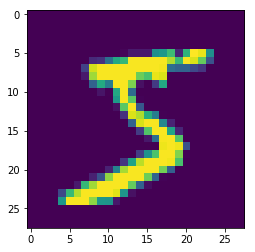

In [43]:
plt.imshow(X_train[0])

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train4D = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test4D = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

In [10]:
X_train4D[0][0][0]

array([0.], dtype=float32)

In [11]:
X_train4D_normal = X_train4D/255
X_test_normal = X_test4D/255

In [12]:
y_train_onehot=np_utils.to_categorical(y_train)
y_test_onehot=np_utils.to_categorical(y_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [14]:
model = Sequential()
model.add(
Conv2D(
    # 滤镜数目
    filters=16,
    # 滤镜大小
    kernel_size=(5,5),
    padding='same',
    input_shape=(28,28,1),
    activation='relu')
)


In [15]:
model.add(
MaxPooling2D(
    pool_size=(2,2)
)
)

In [16]:
model.add(
Conv2D(
    # 滤镜数目
    filters=36,
    # 滤镜大小
    kernel_size=(5,5),
    padding='same',
    activation='relu')
)

In [17]:
model.add(
MaxPooling2D(
    pool_size=(2,2)
)
)

In [18]:
model.add(Dropout(0.25))

In [19]:
model.add(Flatten())

In [20]:
model.add(
    Dense(
        128,
        activation='relu'
         )
)

In [21]:
model.add(
Dropout(0.5)
)

In [22]:
model.add(
Dense(
    10,
    activation='softmax'
)
)

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [24]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
              metrics=['accuracy']
             )

In [25]:
history_train = model.fit(
    x=X_train4D_normal,
    y=y_train_onehot,
    validation_split=0.2,
    epochs=10,
    batch_size=300,
    verbose=2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 964s - loss: 0.4657 - acc: 0.8560 - val_loss: 0.0929 - val_acc: 0.9721
Epoch 2/10
 - 977s - loss: 0.1285 - acc: 0.9614 - val_loss: 0.0626 - val_acc: 0.9815
Epoch 3/10
 - 947s - loss: 0.0978 - acc: 0.9708 - val_loss: 0.0532 - val_acc: 0.9833
Epoch 4/10
 - 971s - loss: 0.0766 - acc: 0.9765 - val_loss: 0.0428 - val_acc: 0.9872
Epoch 5/10
 - 959s - loss: 0.0674 - acc: 0.9793 - val_loss: 0.0436 - val_acc: 0.9874
Epoch 6/10
 - 956s - loss: 0.0574 - acc: 0.9823 - val_loss: 0.0475 - val_acc: 0.9859
Epoch 7/10
 - 941s - loss: 0.0526 - acc: 0.9838 - val_loss: 0.0399 - val_acc: 0.9878
Epoch 8/10
 - 965s - loss: 0.0478 - acc: 0.9856 - val_loss: 0.0407 - val_acc: 0.9885
Epoch 9/10
 - 957s - loss: 0.0410 - acc: 0.9871 - val_loss: 0.0319 - val_acc: 0.9912
Epoch 10/10
 - 945s - loss: 0.0401 - acc: 0.9881 - val_loss: 0.0347 - val_acc: 0.9898


In [26]:
model.save('cnn_mnist.h5')

In [27]:
score = model.evaluate(X_test_normal,y_test_onehot)

10000/10000 [==============================] - 6s 631us/step


In [28]:
score

[0.024394686090232424, 0.9922]

In [29]:
import pandas as pd

In [35]:
prediction = model.predict_classes(X_test_normal)

In [36]:
prediction.shape

(10000,)

In [38]:
pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,979,0,0,0,0,0,0,1,0,0
1,0,1134,1,0,0,0,0,0,0,0
2,2,4,1020,0,2,0,0,4,0,0
3,0,0,0,1001,0,4,0,3,2,0
4,0,0,0,0,979,0,0,0,0,3
5,2,0,0,2,0,886,1,0,0,1
6,5,2,0,0,1,2,948,0,0,0
7,0,2,2,0,0,0,0,1020,1,3
8,3,1,2,1,0,1,0,3,960,3
